In [2]:
import cv2, numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Load Parameters

In [3]:
from utils import read_json

params = read_json('parameters.json')

RESIZE_X = params['resize']['x']
RESIZE_Y = params['resize']['y']
ITEM_FOLDER = params['item_folder']

## Input Data
* Image of the bin
* Mask of recognised items
* List of recognised items

In [4]:
bin_stamp = '170405145336'
contents = ["Colgate_Toothbrush_4PK","Epsom_Salts","Duct_Tape",
            "Bath_Sponge","Crayons","Burts_Bees_Baby_Wipes"]

In [5]:
bin_stamp = '170405145538'
contents = ["glue_sticks","tissue_box","laugh_out_loud_jokes",
            "toilet_brush","expo_eraser","table_cloth"]

In [6]:
contents = [s.lower() for s in contents]

['glue_sticks', 'tissue_box', 'toilet_brush', 'table_cloth']

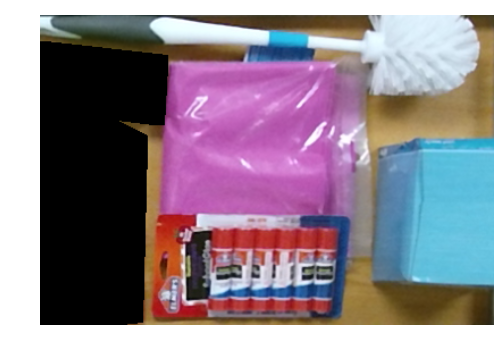

In [7]:
from utils_io import imread_rgb, imread_gray, read_json

image_bin = imread_rgb('bin/' + bin_stamp + '.png')
image_mask = imread_gray('bin/' + bin_stamp + '_item_mask.pgm')
image_bin = cv2.bitwise_and(image_bin, image_bin, mask=image_mask)
plt.imshow(image_bin); plt.axis('off');
data = read_json('bin/' + bin_stamp + '_items.json')
recognised_items = [name for name, proj in data]
items = [item for item in contents if not item in recognised_items]
items

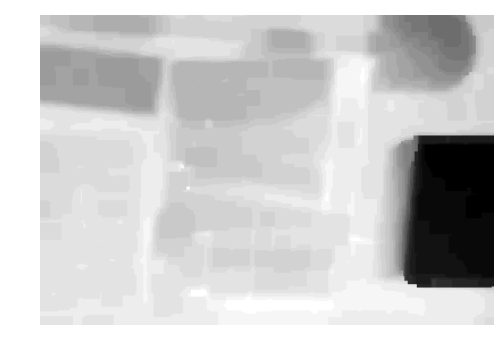

In [13]:
from utils_io import imread_gray
image_depth = imread_gray('bin/' + bin_stamp + '.pgm')
#plt.imshow(image_depth,cmap='gray'); plt.axis('off');
from utils_depth import fill_holes
image_depth = fill_holes(image_depth)
plt.imshow(image_depth,cmap='gray'); plt.axis('off');